# Real FFT demo

With the real FFT (RFFT), we can compute the FFT of a real-valued signal in half the time and space of the complex FFT. This is because the real FFT is symmetric about the Nyquist frequency, so we only need to compute the positive frequencies and then mirror them to get the negative frequencies.

In this notebook, we'll compare the RFFT and the FFT of a real-valued signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

Let's first create a random real-valued signal and compare its RFFT and FFT.

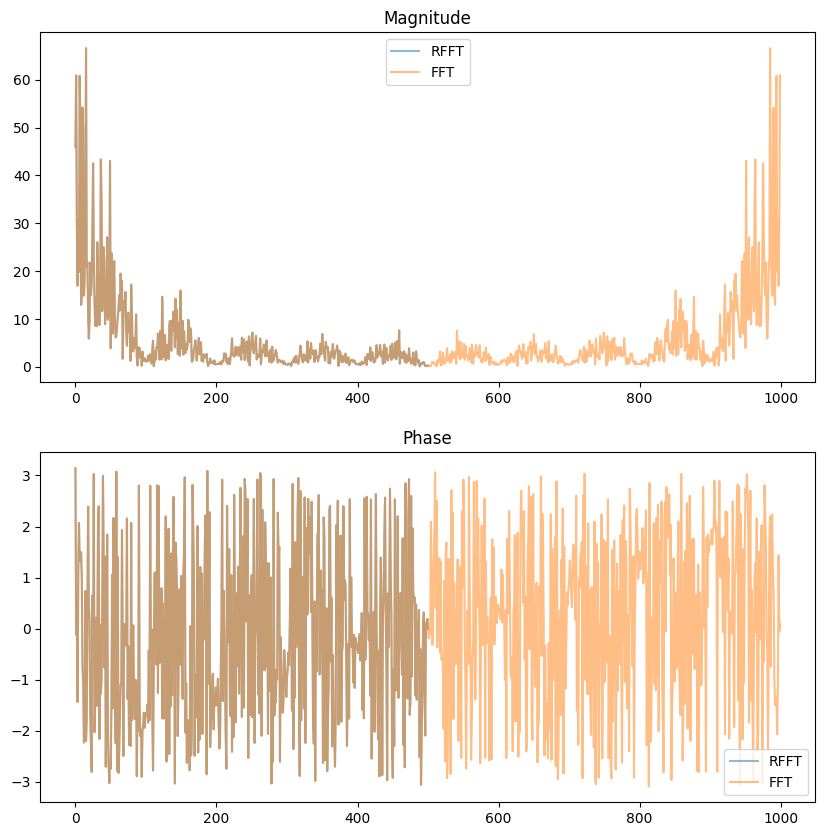

In [2]:
# smooth random signal with a moving average filter
signal = np.random.randn(1000)
n = 10
filter = np.ones(n) / n
signal = np.convolve(signal, filter, mode="same")

# compute frequency response
rfft = np.fft.rfft(signal)
fft = np.fft.fft(signal)

# plot magnitude and phase with two subplots
_, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(np.abs(rfft), label="RFFT", alpha=0.5)
ax[0].plot(np.abs(fft), label="FFT", alpha=0.5)
ax[0].set_title("Magnitude")
ax[0].legend()
ax[1].plot(np.angle(rfft), label="RFFT", alpha=0.5)
ax[1].plot(np.angle(fft), label="FFT", alpha=0.5)
ax[1].set_title("Phase")
ax[1].legend()

We can see that the RFFT and the first half of the FFT are the same. Morever, the second half of the FFT is simply the complex conjugate of the first half of the FFT.

# And what about speed?

Let's profile the RFFT against the FFT of a real-valued signal.

In [3]:
import time

signal = np.random.randn(1000)
n_trials = 1000

# FFT
start_time = time.time()
for _ in range(n_trials):
    np.fft.fft(signal)
proc_time_fft = (time.time() - start_time) / n_trials
print(f"FFT: {proc_time_fft} s")

# RFFT
start_time = time.time()
for _ in range(n_trials):
     np.fft.rfft(signal)
proc_time_rfft = (time.time() - start_time) / n_trials
print(f"RFFT: {proc_time_rfft} s")

FFT: 3.4430980682373044e-05 s
RFFT: 2.0972967147827148e-05 s


It may not always be the case, but on average the RFFT is about 2x faster than the FFT. It can also depend on the size of the input. Let's try sweeping the size of the input.

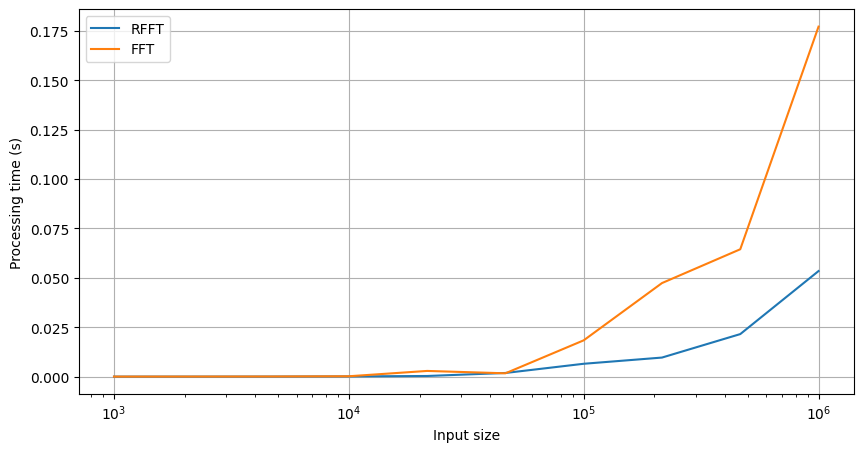

In [4]:
from scipy import fft

input_sizes = np.logspace(3, 6, 10, dtype=int)
n_trials = 10
rfft_times = []
fft_times = []
for input_size in input_sizes:

    fft_len = fft.next_fast_len(input_size, real=True)
    signal = np.random.randn(fft_len)

    # FFT
    start_time = time.time()
    for _ in range(n_trials):
        np.fft.fft(signal)
    fft_times.append((time.time() - start_time) / n_trials)

    # RFFT
    start_time = time.time()
    for _ in range(n_trials):
        np.fft.rfft(signal)
    rfft_times.append((time.time() - start_time) / n_trials)

# plot
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, rfft_times, label="RFFT")
plt.plot(input_sizes, fft_times, label="FFT")
plt.xscale("log")
# plt.yscale("log")
plt.grid()
plt.xlabel("Input size")
plt.ylabel("Processing time (s)")
plt.legend()

For small FFT sizes, there isn't much of a difference, but as the input size grows, the RFFT becomes more and more advantageous. When working with multi-dimensional signals, such as an image, it can make a big difference.
